# Clustering

This notebook will create a clustering model from the Palmer Islands penguin dataset, which contains measurements of penguins. The penguins dataset used in the this exercise is a subset of data collected and made available by [Dr. Kristen
Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a
member of the [Long Term Ecological Research
Network](https://lternet.edu/).

## 1. View the dataset

In [4]:
import pandas as pd

# load the training dataset (dropping rows with nulls)
penguins = pd.read_csv('data/penguins.csv').dropna()

# Display a random sample of 10 observations (just the features)
penguin_features = penguins[penguins.columns[0:4]]
print(penguin_features.sample(10))

     CulmenLength  CulmenDepth  FlipperLength  BodyMass
246          44.5         14.7          214.0    4850.0
169          49.2         15.2          221.0    6300.0
252          48.5         15.0          219.0    4850.0
206          46.5         14.4          217.0    4900.0
45           39.6         18.8          190.0    4600.0
25           35.3         18.9          187.0    3800.0
141          40.6         17.2          187.0    3475.0
277          50.0         19.5          196.0    3900.0
324          51.5         18.7          187.0    3250.0
325          49.8         17.3          198.0    3675.0


## 2. Utilise the Principal Component Analysis (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(penguin_features[penguins.columns[0:4]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
penguins_2d = pca.transform(scaled_features)
print(penguins_2d[0:10])

[[-0.42106032  0.00303797]
 [-0.28822919 -0.10630972]
 [-0.2980564  -0.0474408 ]
 [-0.4061154   0.02199611]
 [-0.43967918  0.20457649]
 [-0.39540885 -0.09660671]
 [-0.18312462  0.17063491]
 [-0.37508936 -0.14328578]
 [-0.29175883  0.2489866 ]
 [-0.37079512 -0.19567099]]


## 3. Create a visualization of two principal components

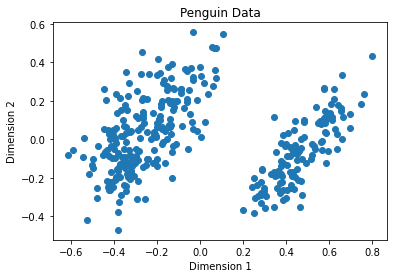

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(penguins_2d[:,0],penguins_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Penguin Data')
plt.show()

## 4. Calculate and visualization the within cluster sum of squares (WCSS) for a series of clustering models with an incrementing number of clusters

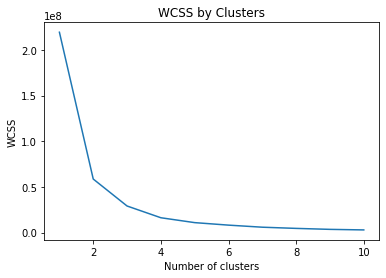

In [7]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the Iris data points
    kmeans.fit(penguin_features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 5. Train a K-Means model on the penguin data with 3 clusters

In [9]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the iris data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(penguin_features.values)
# View the cluster assignments
print(km_clusters)

[1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2 1 1 1 2 1 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1 2 1
 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 1 2 1 2
 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1
 1 1 2 2 0 2 0 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0
 0 0 0 0 2 0 1 0 2 2 0 2 2 0 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0 2 2 2 0 2 0 0 0 2 0 2 0
 2 0 0 0 2 0 2 0 2 0 2 2 0 0 0 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1
 1 1 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1]


## 6. Visualize the K-Means clusters 

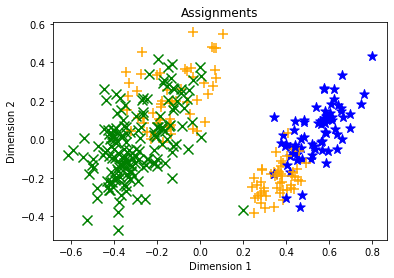

In [11]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(penguins_2d, km_clusters)

## 7. Visualize the actual different species of penguins

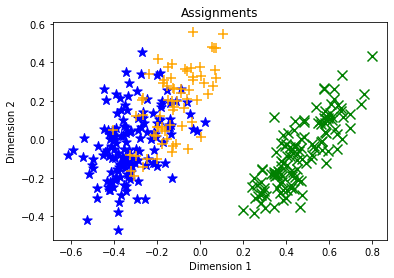

In [12]:
penguin_species = penguins[penguins.columns[4]]
plot_clusters(penguins_2d, penguin_species.values)

## 8. Agglomerative clustering of the penguin dataset

In [14]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(penguin_features.values)
print(agg_clusters)

[0 0 0 0 0 0 2 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0
 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0 0 0 0 0 2 0 2
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0
 0 0 0 2 1 2 1 1 2 2 1 2 1 2 1 2 1 0 1 0 1 2 1 1 1 2 1 1 1 0 1 2 1 1 2 1 1
 1 1 1 1 2 1 0 1 2 2 1 1 0 1 1 1 1 1 2 1 1 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2
 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1
 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## 8. Visualize the agglomerative clustering output

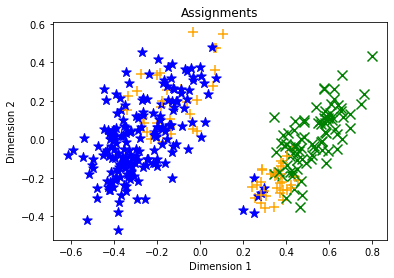

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(penguins_2d, agg_clusters)
